In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("advertising.csv")

In [3]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
# Clean dataset no EDA requires

##  Corralation

In [6]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


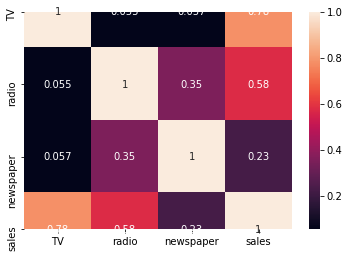

In [8]:
sns.heatmap(df.corr(),annot=True)
plt.show()

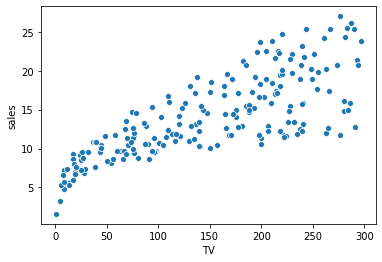

In [9]:
plt.figure()
#plt.scatter(df["TV"],df["sales"])
sns.scatterplot(data=df,x="TV",y="sales")
plt.show()
# Good Corr

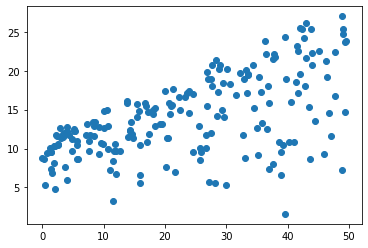

In [18]:
plt.figure()
plt.scatter(df["radio"],df["sales"])
plt.show()
# Better corr

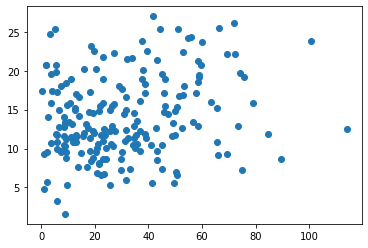

In [19]:
plt.figure()
plt.scatter(df["newspaper"],df["sales"])
plt.show()
# Bad corr

## Seperate / Split  Target and Feature

### TV vs Sales

In [5]:
X = df[["TV"]]
y = df["sales"]

In [13]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [12]:
# Training model
from sklearn.linear_model import LinearRegression

In [9]:
model = LinearRegression()

In [10]:
# OLS (Ordinary Least Square)
# theta1 = sum(x - xbar)(y - ybar)/(x - xbar)2
# theta2 = y - theta1*x
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
model.intercept_

6.923519536059554

In [12]:
# Slope
# 1 unit (TV) == 0.048 unit (sales)
model.coef_

array([0.04812204])

In [13]:
# Prediction
# y_pred = 0.04x + 6.9

In [14]:
y_pred = model.predict(X_test)

In [16]:
y_pred

array([17.06764591, 16.66823297, 11.52879892, 20.4073156 , 19.1368937 ,
       20.57093054, 14.78184893, 15.62398466, 10.32093567, 17.2890073 ,
       14.83959538, 10.25356482, 17.25532187, 12.20731971, 17.78947654,
       12.97246017, 13.26119242, 20.91259704,  8.1554438 , 17.06283371,
       11.75497252, 10.18619396,  8.13138278, 12.09182681, 12.35649804,
       15.98971218,  8.99757953, 18.89628349, 14.95027608, 18.47762173,
       18.46799732, 18.2081383 , 14.12738917, 15.11389102, 18.87703468,
       15.82128503, 17.62586159, 13.15051172, 17.35637816,  7.86671155,
        7.55391828, 11.2737521 ,  7.82340171, 16.74522823,  7.27481044,
       14.01189627, 10.68666319, 17.89534503, 16.78853807, 17.96752809,
       20.864475  , 12.84734286,  7.85708714, 15.71060434, 19.70473379,
       14.89252963, 17.43818563,  8.12657058, 18.0926454 ,  8.99276733])

## Model evaluation

In [17]:
# residual = y_test - y_pred

In [14]:
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
mse = mean_squared_error(y_test,y_pred)

In [17]:
rmse = np.sqrt(mse)

In [18]:
# model score / R2 score
r2 = r2_score(y_test,y_pred)

In [21]:
print(" MSE : {},\n RMSE : {},\n R2 : {}".format(mse,rmse,r2))

 MSE : 10.571057434656955,
 RMSE : 3.251316261863333,
 R2 : 0.575061860494331


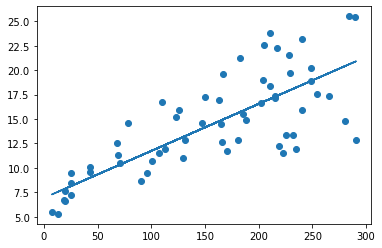

In [22]:
# Plot the model
plt.figure()
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred)
plt.show()

### Some Extra myself

In [23]:
tv = {"Target":y_test,"Predictions":y_pred}

In [24]:
tv_df = pd.DataFrame(data=tv)

In [25]:
tv_df.head()

,Target,Predictions
58,23.8,17.067646
40,16.6,16.668233
34,9.5,11.528799
102,14.8,20.407316
184,17.6,19.136894


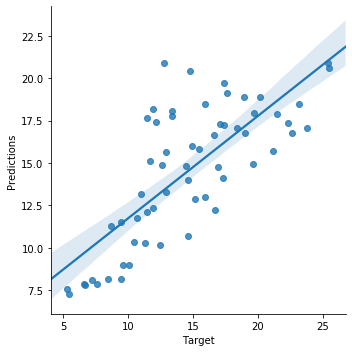

In [26]:
sns.lmplot(data=tv_df,x="Target",y="Predictions")

### Radio vs Sales

intercept:  9.440936561425886
Coef:  [0.1874808]
mse: 14.604130559272193,
rmse: 3.8215351050686674,
r2: 0.41293932917162335


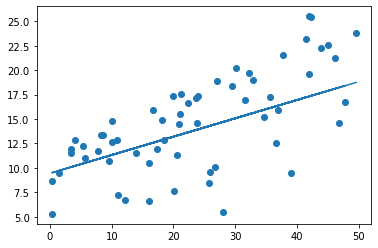

In [18]:
X = df[["radio"]]
y = df["sales"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)
model = LinearRegression()
model.fit(X_train,y_train)

print("intercept: ",model.intercept_)
print("Coef: ",model.coef_)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_test,y_pred)

print("mse: {},\nrmse: {},\nr2: {}".format(mse,rmse,r2))

# Plot the model
plt.figure()
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred)
plt.show()

### Newspaper vs Sales

intercept:  11.829668884877877
Coef:  [0.06532045]
mse: 25.49745237441493,
rmse: 5.049500210358935,
r2: -0.024953278429509007


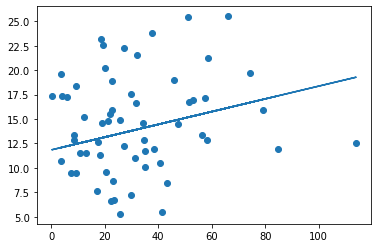

In [19]:
X = df[["newspaper"]]
y = df["sales"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)
model = LinearRegression()
model.fit(X_train,y_train)

print("intercept: ",model.intercept_)
print("Coef: ",model.coef_)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_test,y_pred)

print("mse: {},\nrmse: {},\nr2: {}".format(mse,rmse,r2))

# Plot the model
plt.figure()
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred)
plt.show()

### Multiple Linear Regression
#### checking Multicolinearity between features

In [23]:
X = df[["TV","radio","newspaper"]]
y = df["sales"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)
model = LinearRegression()
model.fit(X_train,y_train)

print(model.intercept_)
print(model.coef_)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_test,y_pred)

print("mse: {},\nrmse: {},\nr2: {}".format(mse,rmse,r2))


2.937215734690609
[0.04695205 0.17658644 0.00185115]
mse: 1.9289249074665735,
rmse: 1.3888574107756972,
r2: 0.9224605706201434


In [ ]:
# Compare Coef previous and current

# TV - 0.04  -- 0.04
# Radio - 0.18  -- 0.17
# newspaper - 0.06  -- 0.00

In [30]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [ ]:
# On combining, newspaper has no relation with sales
# Radio and newspaper having relationship
# that why newspaper show relation with sales here 

In [ ]:
## Taking care of multicolinearity, remove newspaper

In [24]:
X = df[["TV","radio"]]
y = df["sales"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)
model = LinearRegression()
model.fit(X_train,y_train)

print(model.intercept_)
print(model.coef_)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_test,y_pred)

print("mse: {},\nrmse: {},\nr2: {}".format(mse,rmse,r2))

2.9647671191401574
[0.04697554 0.17765046]
mse: 1.9147050289721788,
rmse: 1.383728668840889,
r2: 0.9230321850256801


In [32]:
# multi-dimension trick - y_pred vs residuals

In [25]:
residuals = y_test - y_pred

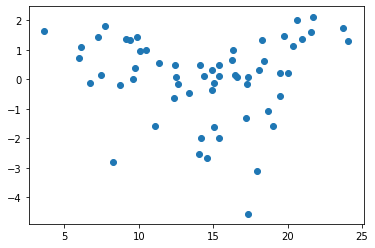

In [26]:
plt.figure()
plt.scatter(y_pred,residuals)
plt.show()
# This show clearly no linear relationship

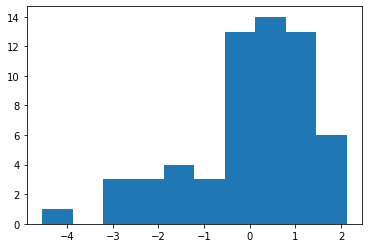

In [27]:
# residual histogram
plt.figure()
plt.hist(residuals)
plt.show()
# Negative skewness

In [28]:
# Conclusion :-
# No linear relationship
# Heteroskedasticity
# No - multicolinearity
# No residual normal distribution

# Solution : Polynimial regression

## Polynomial Regression

### Theory

In [4]:
# Linear 
def poly_1(x):
    
    y = 4*x + 5
    return y    


# Quadratic
def poly_2(x):
    
    y = 6*(x**2) + 4*x + 5
    return y

# Cubic
def poly_3(x):
    
    y = 8*(x**3) + 6*(x**2) + 4*x + 5
    return y


# Plot
def plot(x,y):
    
    plt.figure()
    plt.plot(x,y)
    plt.show()

In [6]:
x = np.arange(-100,100)

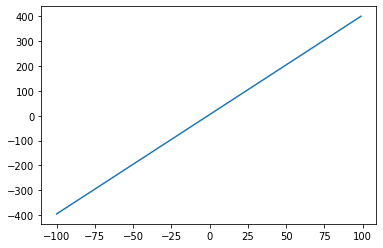

In [7]:
# plot linear relation

y = poly_1(x)
plot(x,y)

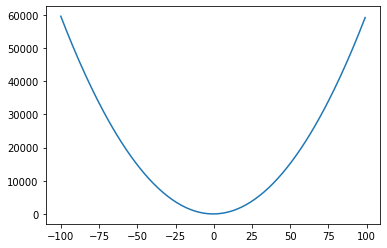

In [8]:
# plot quadratic relation

y = poly_2(x)
plot(x,y)

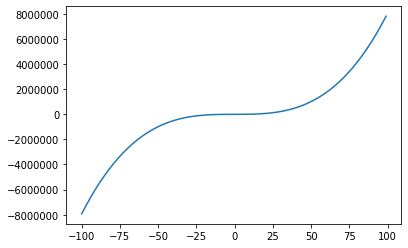

In [9]:
# plot cubic relation

y = poly_3(x)
plot(x,y)

### Modelling Polynomial

In [7]:
X = df[["TV","radio"]]
y = df["sales"]

In [8]:
from sklearn.preprocessing import PolynomialFeatures

In [9]:
# Poly_2 - one curve
poly = PolynomialFeatures(2)

In [10]:
X_poly = poly.fit_transform(X)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_poly,y,test_size=0.3, random_state=1)

In [16]:
# Linear Regression
model = LinearRegression()

In [17]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
y_pred = model.predict(X_test)

In [26]:
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_test,y_pred)

print("mse: {},\nrmse: {},\nr2: {}".format(mse,rmse,r2))

mse: 0.17238345081004675,
rmse: 0.4151908607014932,
r2: 0.9930704848288278


In [20]:
residuals = y_test - y_pred

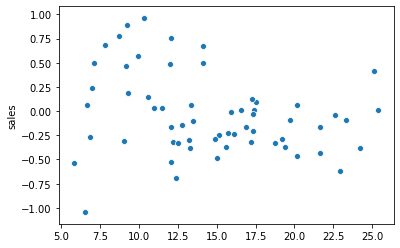

In [21]:
plt.figure()
sns.scatterplot(y_pred,residuals)
plt.show()
# heteroskedacity - ignore

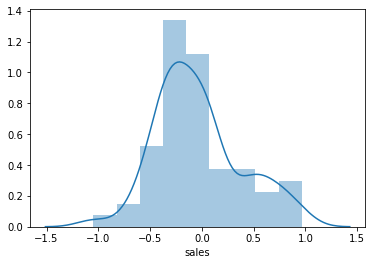

In [22]:
plt.figure()
#plt.hist(residuals)
sns.distplot(residuals)
plt.show()
# Residual normally distributed